# Assignment 2 - Machine Learning
**Project:** Project 1 - Classify Images of Road Traffic Signs

**Group Name:** Dan & Ethan
| Name               | Student Number |
|--------------------|----------------|
| Daniel Schellekens | s3900792       |
| Ethan Rayner       | s3902240       |

In [147]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

TEST_TRAIN_SPLIT = 0.5

data = pd.read_csv("images.csv")
train_data, val_data = train_test_split(data, test_size=TEST_TRAIN_SPLIT, random_state=0)
print("Test set: {} rows\nValidation set: {} rows".format(train_data.shape[0], val_data.shape[0]))

Test set: 1849 rows
Validation set: 1850 rows


In [148]:
import matplotlib.pyplot as plt
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

In [149]:
INPUT_DIM = (28,28,3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 16

In [150]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

tf.__version__

'2.3.0'

In [151]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])

In [152]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 2352)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               602368    
_________________________________________________________________
dense_13 (Dense)             (None, 16)                4112      
Total params: 606,480
Trainable params: 606,480
Non-trainable params: 0
_________________________________________________________________


In [153]:
model.compile(optimizer='adam', #this used to be SGD and idk if i can just change it to adam without changing other stuff but the results look better
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [154]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./',
        x_col="path",
        y_col="type",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./',
        x_col="path",
        y_col="type",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 1849 validated image filenames belonging to 16 classes.
Found 1850 validated image filenames belonging to 16 classes.


In [155]:
#levels out around 30 epochs
history = model.fit_generator(train_generator, validation_data = validation_generator, epochs=40, verbose=0)

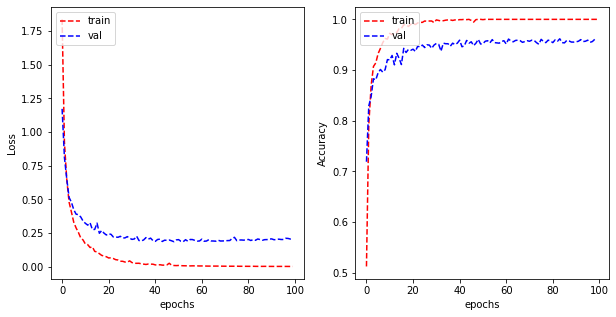

In [156]:
# Not sure how i feel about this curve

plot_learning_curve(history.history['loss'], history.history['val_loss'], 
                    history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [157]:
test_data['type'] = test_data['type'].astype('str') ##I'm guessing test data will end up being our test data

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./',
        x_col="path",
        y_col="type",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

NameError: name 'test_data' is not defined

In [ ]:
model.evaluate(validation_generator)

58/58 [==============================] - 1s 12ms/step - loss: 0.7482 - categorical_accuracy: 0.8314


[0.7482094764709473, 0.8313513398170471]

In [ ]:
label_names = {'rightofway' : 0, 'stop' : 1, 'bicycle' : 2, 'limitedtraffic' : 3, 'noentry' : 4, 'noparking' : 5, 'roundabout' : 6, 'speed' : 7, 'trafficdirective' : 8, 'traveldirection' : 9, 'continue' : 10, 'crossing' : 11, 'laneend' : 12, 'parking' : 13, 'giveway' : 14, 'warning' : 15}

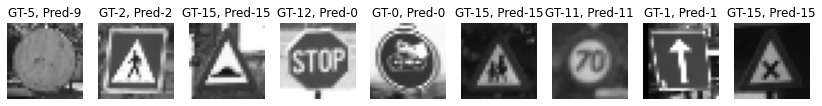

In [ ]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(16,4))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = model.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 10:
            plt.subplot(1,10,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(np.argmax(y[0]), np.argmax(y_hat[0]) ))
            
        else:
            break
        
        plt.axis('off')

        # 0 - bicycle
        # 1 - continue
        # 2 - crossing
        # 3 - giveway
        # 4 - laneend
        # 5 - limitedtraffic
        # 6 - noentry
        # 7 - noparking
        # 8 - parking
        # 9 - rightofway
        # 10 - roundabout
        # 11 - speed
        # 12 - stop
        # 13 - trafficdirective
        # 14 - traveldirection
        # 15 - Warning
        